In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
#Steps

# 1. Preprocess + EDA + Feature Selection
# 2. Extract imput and output cols
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/model selection
# 7. Deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [8]:
df=df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt

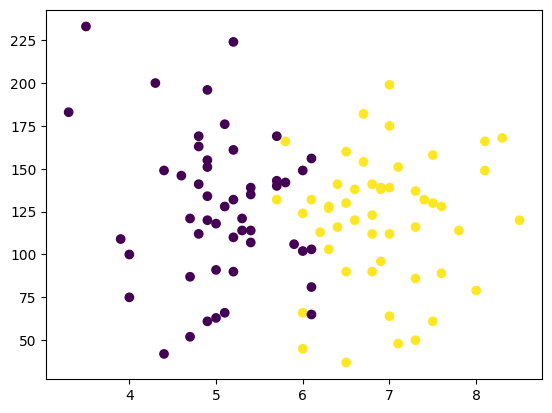

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [19]:
x_train

,cgpa,iq
65,8.1,166.0
41,5.4,114.0
99,6.2,113.0
36,5.7,140.0
7,5.0,63.0
...,...,...
76,4.9,155.0
98,6.3,103.0
57,6.5,130.0
90,7.3,86.0


In [20]:
x_test

,cgpa,iq
64,7.0,64.0
23,4.7,87.0
77,7.3,50.0
44,7.5,61.0
42,7.6,89.0
78,6.1,81.0
1,5.9,106.0
48,6.6,138.0
50,3.5,233.0
16,5.2,224.0


In [21]:
x_train
y_train

65    1
41    0
99    1
36    0
7     0
     ..
76    0
98    1
57    1
90    1
2     0
Name: placement, Length: 90, dtype: int64

In [22]:
x_train

,cgpa,iq
65,8.1,166.0
41,5.4,114.0
99,6.2,113.0
36,5.7,140.0
7,5.0,63.0
...,...,...
76,4.9,155.0
98,6.3,103.0
57,6.5,130.0
90,7.3,86.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)

In [25]:
x_train

array([[ 1.89718552,  1.1397848 ],
       [-0.51272604, -0.29606792],
       [ 0.20132183, -0.32368047],
       [-0.24495809,  0.42185844],
       [-0.86974998, -1.70430809],
       [ 0.11206585,  0.86365928],
       [ 0.82611372, -0.79309386],
       [-1.13751793, -0.10278006],
       [-1.76230981, -0.68264366],
       [ 0.02280986, -2.20133403],
       [-1.40528588,  0.67037141],
       [-1.13751793, -2.00804617],
       [-0.86974998, -0.93115663],
       [-1.40528588, -2.28417169],
       [-1.04826194,  1.22262246],
       [-1.49454186,  2.07861158],
       [ 1.36164962,  0.91888438],
       [-0.69123801,  1.00172204],
       [ 0.55834577, -0.13039261],
       [ 0.46908978, -2.42223445],
       [-0.51272604,  0.28379568],
       [ 0.64760175,  1.58158564],
       [-0.78049399,  0.09050781],
       [ 0.82611372,  0.36663333],
       [ 0.11206585, -0.599806  ],
       [ 0.02280986, -0.62741855],
       [ 1.36164962,  0.14573292],
       [ 0.9153697 ,  1.38829777],
       [-0.86974998,

In [26]:
x_test = scaler.transform(x_test)

In [27]:
x_test

array([[ 0.9153697 , -1.67669554],
       [-1.13751793, -1.04160684],
       [ 1.18313765, -2.06327127],
       [ 1.36164962, -1.7595332 ],
       [ 1.4509056 , -0.98638173],
       [ 0.11206585, -1.20728215],
       [-0.06644612, -0.51696834],
       [ 0.55834577,  0.36663333],
       [-2.20858973,  2.98982581],
       [-0.69123801,  2.74131284]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = clf.predict(x_test)

In [32]:
y_test

64    1
23    0
77    1
44    1
42    1
78    0
1     0
48    1
50    0
16    0
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.9

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

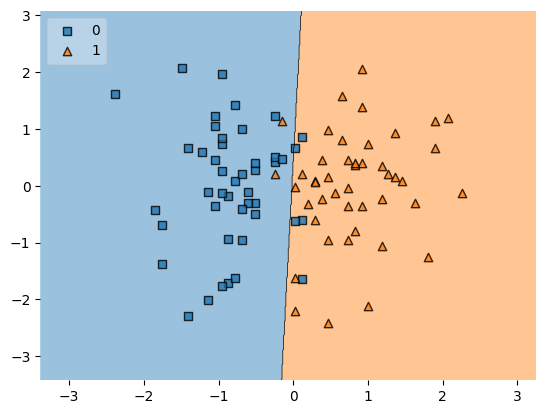

In [38]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
#learn deployment at the end